<a href="https://colab.research.google.com/github/PatriciaSojcakova/Zneus_project/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***Projekt 1***

---

In [ ]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# **1. Prieskumná analýza dát**

## **1.1 Analýza štruktúr dát**
Dataset pozostáva zo súboru `speeddating.csv`, ktorý obsahuje informácie o osobách a ich preferencie o potenciálnych partneroch. Súbor obsahuje 8378 záznamov, 123 atribútov typov int64 a object.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project_1/speeddating.csv')

/tmp/ipython-input-1521480062.py:1: DtypeWarning: Columns (3,10,11,15,16,17,18,19,39,40,41,42,43,44,51,52,53,54,55,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,107,109) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project_1/speeddating.csv')


In [ ]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 123 columns):
 #    Column                           Dtype 
---   ------                           ----- 
 0    has_null                         int64 
 1    wave                             int64 
 2    gender                           object
 3    age                              object
 4    age_o                            object
 5    d_age                            int64 
 6    d_d_age                          object
 7    race                             object
 8    race_o                           object
 9    samerace                         int64 
 10   importance_same_race             object
 11   importance_same_religion         object
 12   d_importance_same_race           object
 13   d_importance_same_religion       object
 14   field                            object
 15   pref_o_attractive                object
 16   pref_o_sincere                   object
 17   pref_o_intel

In [ ]:
data_new = data.copy()

for col in data_new.columns:
  if data_new[col].dtype == 'object' and not col.startswith('d_'):
    data_new[col] = pd.to_numeric(data_new[col], errors='coerce')

data_new.info(verbose=True)
corr_matrix_all = data_new.corr(method='pearson', numeric_only=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 123 columns):
 #    Column                           Dtype  
---   ------                           -----  
 0    has_null                         int64  
 1    wave                             int64  
 2    gender                           float64
 3    age                              float64
 4    age_o                            float64
 5    d_age                            int64  
 6    d_d_age                          object 
 7    race                             float64
 8    race_o                           float64
 9    samerace                         int64  
 10   importance_same_race             float64
 11   importance_same_religion         float64
 12   d_importance_same_race           object 
 13   d_importance_same_religion       object 
 14   field                            float64
 15   pref_o_attractive                float64
 16   pref_o_sincere                   float64

In [ ]:
corr_decision = corr_matrix_all['decision'].sort_values(ascending=False)
corr_decision_o = corr_matrix_all['decision_o'].sort_values(ascending=False)

print("Korelácia s 'decision':")
display(corr_decision)

print("\nKorelácia s 'decision_o':")
display(corr_decision_o)

Korelácia s 'decision':


,decision
decision,1.000000
match,0.521943
like,0.513463
attractive_partner,0.486775
funny_partner,0.414477
...,...
importance_same_race,-0.092271
gender,NaN
race,NaN
race_o,NaN



Korelácia s 'decision_o':


,decision_o
decision_o,1.000000
match,0.522326
attractive_o,0.486885
funny_o,0.414276
shared_interests_o,0.400501
...,...
shared_interests_important,-0.079075
gender,NaN
race,NaN
race_o,NaN


Vybratie atribútov

In [ ]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 123 columns):
 #    Column                           Dtype 
---   ------                           ----- 
 0    has_null                         int64 
 1    wave                             int64 
 2    gender                           object
 3    age                              object
 4    age_o                            object
 5    d_age                            int64 
 6    d_d_age                          object
 7    race                             object
 8    race_o                           object
 9    samerace                         int64 
 10   importance_same_race             object
 11   importance_same_religion         object
 12   d_importance_same_race           object
 13   d_importance_same_religion       object
 14   field                            object
 15   pref_o_attractive                object
 16   pref_o_sincere                   object
 17   pref_o_intel

In [ ]:
cols = ['gender', 'age', 'age_o', 'd_age','samerace', 'importance_same_race', 'importance_same_religion',
        'attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o',
        'attractive_partner', 'sincere_partner', 'intelligence_partner', 'funny_partner', 'ambition_partner',
        'interests_correlate','like', 'met', 'match']
data = data[cols].copy()

data.head()

,gender,age,age_o,d_age,samerace,importance_same_race,importance_same_religion,attractive_o,sinsere_o,intelligence_o,...,ambitous_o,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,interests_correlate,like,met,match
0,female,21,27,6,0,2,4,6,8,8,...,8,6,9,7,7,6,0.14,7,0,0
1,female,21,22,1,0,2,4,7,8,10,...,7,7,8,7,8,5,0.54,7,1,0
2,female,21,22,1,1,2,4,10,10,10,...,10,5,8,9,8,5,0.16,7,1,1
3,female,21,23,2,0,2,4,7,8,9,...,9,7,6,8,7,6,0.61,7,0,1
4,female,21,24,3,0,2,4,8,7,9,...,9,5,6,7,7,6,0.21,6,0,1


In [ ]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    8378 non-null   object
 1   age                       8378 non-null   object
 2   age_o                     8378 non-null   object
 3   d_age                     8378 non-null   int64 
 4   samerace                  8378 non-null   int64 
 5   importance_same_race      8378 non-null   object
 6   importance_same_religion  8378 non-null   object
 7   attractive_o              8378 non-null   object
 8   sinsere_o                 8378 non-null   object
 9   intelligence_o            8378 non-null   object
 10  funny_o                   8378 non-null   object
 11  ambitous_o                8378 non-null   object
 12  attractive_partner        8378 non-null   object
 13  sincere_partner           8378 non-null   object
 14  intelligence_partner    

## **1.2 Čistenie dát**


### **1.2.A Identifikácia a odstránenie duplikátov**

In [ ]:
print("Duplicity v dátach:", data.duplicated().sum())

Duplicity v dátach: 1


Dataset neobsahuje žiadne duplikáty.

### **1.2.B Identifikácia chýbajúcich hodnôt a ich nahradenie**
Zistili sme, že namiesto hodnoty NaN alebo null sa v datasete objavuje "?". Pre lepši manipuláciu s dátami sme túto hodnotu nahradili hodnotov NaN.

In [ ]:
print('------------ Počet výskytov "?" v stĺpcoch ------------')
for col in data.columns:
    print(f"{col}: {(data[col] == '?').sum()}")

------------ Počet výskytov "?" v stĺpcoch ------------
gender: 0
age: 95
age_o: 104
d_age: 0
samerace: 0
importance_same_race: 79
importance_same_religion: 79
attractive_o: 212
sinsere_o: 287
intelligence_o: 306
funny_o: 360
ambitous_o: 722
attractive_partner: 202
sincere_partner: 277
intelligence_partner: 296
funny_partner: 350
ambition_partner: 712
interests_correlate: 158
like: 240
met: 375
match: 0


In [ ]:
data.replace('?', np.nan, inplace=True)
print(data.isnull().sum())

gender                        0
age                          95
age_o                       104
d_age                         0
samerace                      0
importance_same_race         79
importance_same_religion     79
attractive_o                212
sinsere_o                   287
intelligence_o              306
funny_o                     360
ambitous_o                  722
attractive_partner          202
sincere_partner             277
intelligence_partner        296
funny_partner               350
ambition_partner            712
interests_correlate         158
like                        240
met                         375
match                         0
dtype: int64


In [ ]:
for col in ['age', 'age_o', 'd_age']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

mask_age_missing = data['age'].isna() & data['age_o'].notna() & data['d_age'].notna()
data.loc[mask_age_missing, 'age'] = data.loc[mask_age_missing, 'd_age'] + data.loc[mask_age_missing, 'age_o']


mask_age_o_missing = data['age_o'].isna() & data['age'].notna() & data['d_age'].notna()
data.loc[mask_age_o_missing, 'age_o'] = data.loc[mask_age_o_missing, 'age'] - data.loc[mask_age_o_missing, 'd_age']


print(data[['age','age_o','d_age']].isna().sum())

age      1
age_o    1
d_age    0
dtype: int64


In [ ]:
data = data.dropna()
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 6639 entries, 0 to 8377
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    6639 non-null   object 
 1   age                       6639 non-null   float64
 2   age_o                     6639 non-null   float64
 3   d_age                     6639 non-null   int64  
 4   samerace                  6639 non-null   int64  
 5   importance_same_race      6639 non-null   object 
 6   importance_same_religion  6639 non-null   object 
 7   attractive_o              6639 non-null   object 
 8   sinsere_o                 6639 non-null   object 
 9   intelligence_o            6639 non-null   object 
 10  funny_o                   6639 non-null   object 
 11  ambitous_o                6639 non-null   object 
 12  attractive_partner        6639 non-null   object 
 13  sincere_partner           6639 non-null   object 
 14  intelligence_

### **1.2.C Oprava dátových typov dát**
Atribúty, kde sa nachádzajú iba čísla a hodnoty Nan, pretypujeme na numerický dátový typ.

In [ ]:
for col in data.columns:
  if (col not in ["gender", "race", "race_o"]) :
    data[col] = pd.to_numeric(data[col], errors='coerce')

data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 6639 entries, 0 to 8377
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    6639 non-null   object 
 1   age                       6639 non-null   float64
 2   age_o                     6639 non-null   float64
 3   d_age                     6639 non-null   int64  
 4   samerace                  6639 non-null   int64  
 5   importance_same_race      6639 non-null   int64  
 6   importance_same_religion  6639 non-null   int64  
 7   attractive_o              6639 non-null   float64
 8   sinsere_o                 6639 non-null   float64
 9   intelligence_o            6639 non-null   float64
 10  funny_o                   6639 non-null   float64
 11  ambitous_o                6639 non-null   float64
 12  attractive_partner        6639 non-null   float64
 13  sincere_partner           6639 non-null   float64
 14  intelligence_

In [ ]:
data.head()

,gender,age,age_o,d_age,samerace,importance_same_race,importance_same_religion,attractive_o,sinsere_o,intelligence_o,...,ambitous_o,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,interests_correlate,like,met,match
0,female,21.0,27.0,6,0,2,4,6.0,8.0,8.0,...,8.0,6.0,9.0,7.0,7.0,6.0,0.14,7.0,0,0
1,female,21.0,22.0,1,0,2,4,7.0,8.0,10.0,...,7.0,7.0,8.0,7.0,8.0,5.0,0.54,7.0,1,0
2,female,21.0,22.0,1,1,2,4,10.0,10.0,10.0,...,10.0,5.0,8.0,9.0,8.0,5.0,0.16,7.0,1,1
3,female,21.0,23.0,2,0,2,4,7.0,8.0,9.0,...,9.0,7.0,6.0,8.0,7.0,6.0,0.61,7.0,0,1
4,female,21.0,24.0,3,0,2,4,8.0,7.0,9.0,...,9.0,5.0,6.0,7.0,7.0,6.0,0.21,6.0,0,1


### **1.2.D Identifikácia odľahlých hodnôt**

In [ ]:
outliers_cols = ['attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o',
                  'attractive_partner', 'sincere_partner', 'intelligence_partner', 'funny_partner', 'ambition_partner',
                  'interests_correlate','like',]

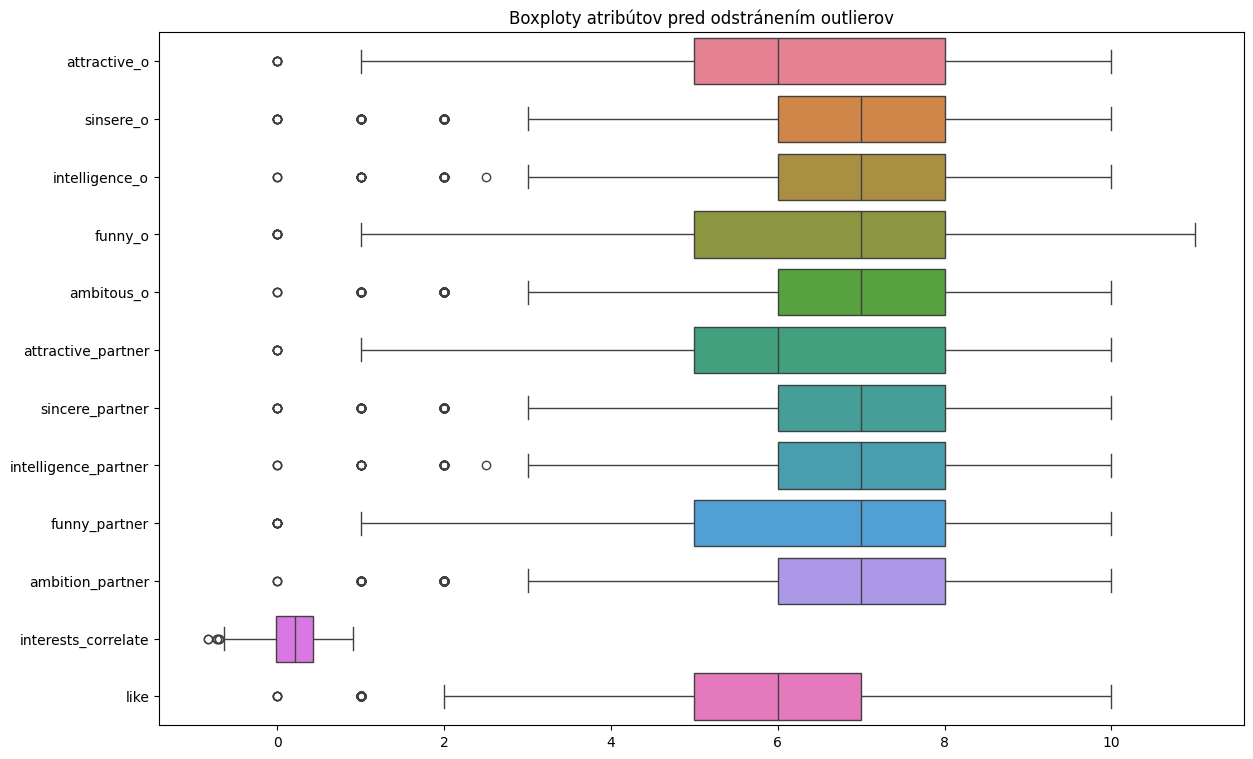

In [ ]:
plt.figure(figsize=(14, len(outliers_cols) * 0.75))
sns.boxplot(data=data[outliers_cols], orient='h')
plt.title("Boxploty atribútov pred odstránením outlierov")
plt.show()

In [ ]:
'''outlier_indices = set()

for col in outliers_cols:
    q25, q75 = percentile(data[col].dropna(), 25), percentile(data[col].dropna(), 75)
    iqr = q75 - q25
    cut_off = 1.5 * iqr
    lower, upper = q25 - cut_off, q75 + cut_off

    outliers = data[(data[col] < lower) | (data[col] > upper)].index
    outlier_indices.update(outliers)

    print(f"\nAtribút: {col}")
    print(f"Q1 (25. percentil): {q25:.2f}")
    print(f"Q3 (75. percentil): {q75:.2f}")
    print(f"IQR: {iqr:.2f}")
    print(f"Dolná hranica: {lower:.2f}")
    print(f"Horná hranica: {upper:.2f}")
    print(f"Počet odľahlých hodnôt: {len(outliers)}")

data = data.drop(index=outlier_indices)'''

'outlier_indices = set()\n\nfor col in outliers_cols:\n    q25, q75 = percentile(data[col].dropna(), 25), percentile(data[col].dropna(), 75)\n    iqr = q75 - q25\n    cut_off = 1.5 * iqr\n    lower, upper = q25 - cut_off, q75 + cut_off\n\n    outliers = data[(data[col] < lower) | (data[col] > upper)].index\n    outlier_indices.update(outliers)\n\n    print(f"\nAtribút: {col}")\n    print(f"Q1 (25. percentil): {q25:.2f}")\n    print(f"Q3 (75. percentil): {q75:.2f}")\n    print(f"IQR: {iqr:.2f}")\n    print(f"Dolná hranica: {lower:.2f}")\n    print(f"Horná hranica: {upper:.2f}")\n    print(f"Počet odľahlých hodnôt: {len(outliers)}")\n\ndata = data.drop(index=outlier_indices)'

In [ ]:
data = data[data['funny_o'] <= 10]

print(data['funny_o'].max())

10.0


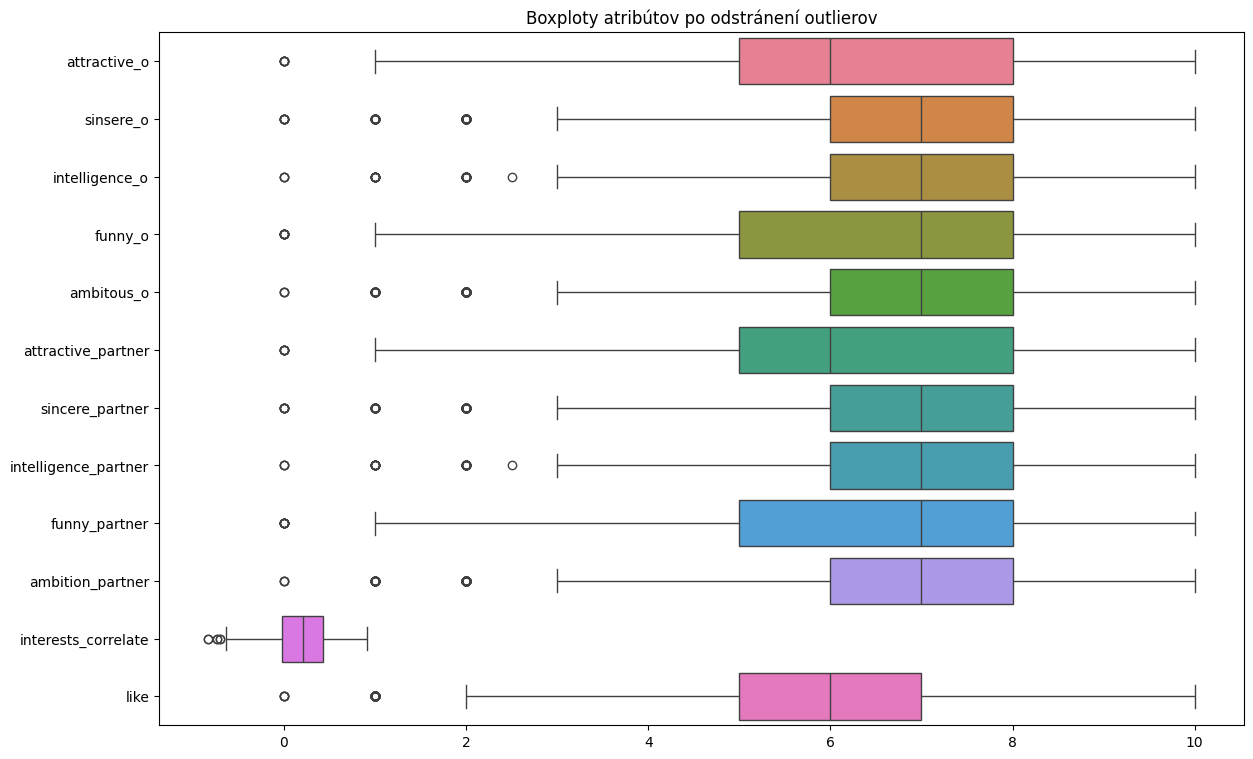

In [ ]:
plt.figure(figsize=(14, len(outliers_cols) * 0.75))
sns.boxplot(data=data[outliers_cols], orient='h')
plt.title("Boxploty atribútov po odstránení outlierov")
plt.show()

In [ ]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 6638 entries, 0 to 8377
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    6638 non-null   object 
 1   age                       6638 non-null   float64
 2   age_o                     6638 non-null   float64
 3   d_age                     6638 non-null   int64  
 4   samerace                  6638 non-null   int64  
 5   importance_same_race      6638 non-null   int64  
 6   importance_same_religion  6638 non-null   int64  
 7   attractive_o              6638 non-null   float64
 8   sinsere_o                 6638 non-null   float64
 9   intelligence_o            6638 non-null   float64
 10  funny_o                   6638 non-null   float64
 11  ambitous_o                6638 non-null   float64
 12  attractive_partner        6638 non-null   float64
 13  sincere_partner           6638 non-null   float64
 14  intelligence_

## **1.3 Analýza vybraných atribútov**

Opis atribútov:

Vykonanie základných deskriptívnych štatistík nad numerickými atribútmi




In [ ]:
numeric_columns = data.select_dtypes(include=['int64','float64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

for col in numeric_columns:
  display(data[col].describe())
  print("-" * 30)

,age
count,6638.000000
mean,26.335041
std,3.724117
min,18.000000
25%,24.000000
50%,26.000000
75%,28.000000
max,60.000000


------------------------------


,age_o
count,6638.000000
mean,26.181229
std,3.806155
min,0.000000
25%,24.000000
50%,26.000000
75%,28.000000
max,55.000000


------------------------------


,d_age
count,6638.000000
mean,3.738626
std,3.399065
min,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,32.000000


------------------------------


,samerace
count,6638.000000
mean,0.393643
std,0.488594
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


------------------------------


,importance_same_race
count,6638.000000
mean,3.816963
std,2.836688
min,0.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,10.000000


------------------------------


,importance_same_religion
count,6638.000000
mean,3.666616
std,2.835057
min,1.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,10.000000


------------------------------


,attractive_o
count,6638.000000
mean,6.199443
std,1.945551
min,0.000000
25%,5.000000
50%,6.000000
75%,8.000000
max,10.000000


------------------------------


,sinsere_o
count,6638.000000
mean,7.173772
std,1.742947
min,0.000000
25%,6.000000
50%,7.000000
75%,8.000000
max,10.000000


------------------------------


,intelligence_o
count,6638.000000
mean,7.378503
std,1.548438
min,0.000000
25%,6.000000
50%,7.000000
75%,8.000000
max,10.000000


------------------------------


,funny_o
count,6638.000000
mean,6.408557
std,1.943743
min,0.000000
25%,5.000000
50%,7.000000
75%,8.000000
max,10.000000


------------------------------


,ambitous_o
count,6638.000000
mean,6.790976
std,1.797523
min,0.000000
25%,6.000000
50%,7.000000
75%,8.000000
max,10.000000


------------------------------


,attractive_partner
count,6638.000000
mean,6.197936
std,1.948491
min,0.000000
25%,5.000000
50%,6.000000
75%,8.000000
max,10.000000


------------------------------


,sincere_partner
count,6638.000000
mean,7.177840
std,1.743185
min,0.000000
25%,6.000000
50%,7.000000
75%,8.000000
max,10.000000


------------------------------


,intelligence_partner
count,6638.000000
mean,7.378427
std,1.547470
min,0.000000
25%,6.000000
50%,7.000000
75%,8.000000
max,10.000000


------------------------------


,funny_partner
count,6638.000000
mean,6.413378
std,1.938997
min,0.000000
25%,5.000000
50%,7.000000
75%,8.000000
max,10.000000


------------------------------


,ambition_partner
count,6638.000000
mean,6.793236
std,1.797994
min,0.000000
25%,6.000000
50%,7.000000
75%,8.000000
max,10.000000


------------------------------


,interests_correlate
count,6638.000000
mean,0.193246
std,0.305760
min,-0.830000
25%,-0.020000
50%,0.210000
75%,0.430000
max,0.910000


------------------------------


,like
count,6638.000000
mean,6.140810
std,1.826948
min,0.000000
25%,5.000000
50%,6.000000
75%,7.000000
max,10.000000


------------------------------


,met
count,6638.000000
mean,0.050768
std,0.264945
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,8.000000


------------------------------


,match
count,6638.000000
mean,0.171889
std,0.377312
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


------------------------------


Grafické zobrazenie vybraných atribútov:

---



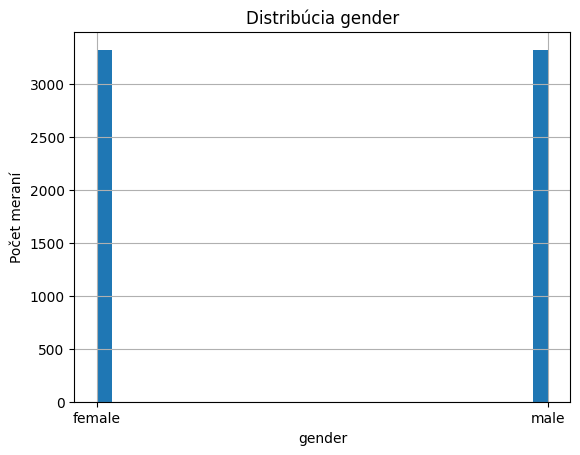

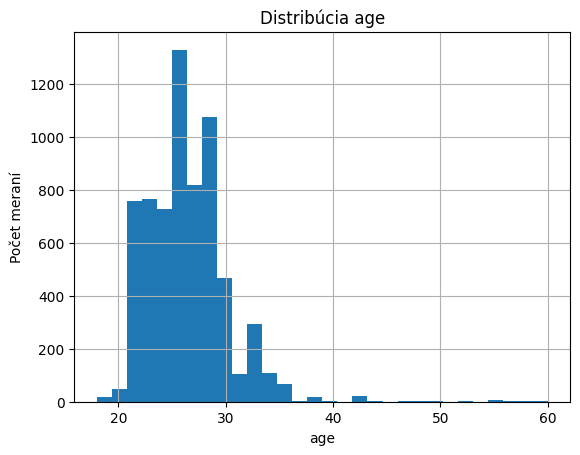

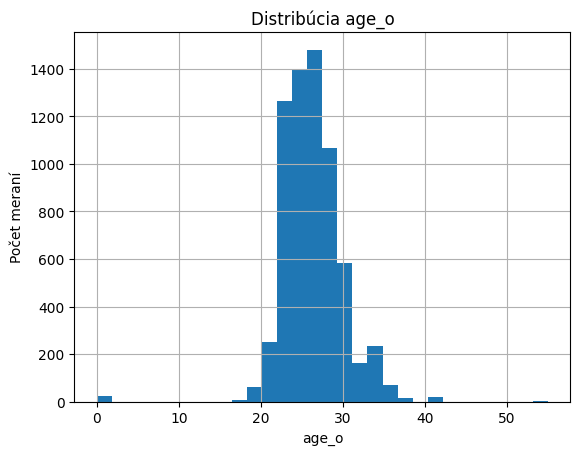

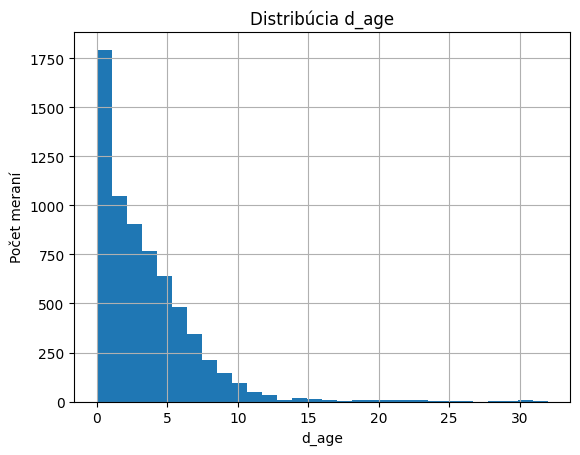

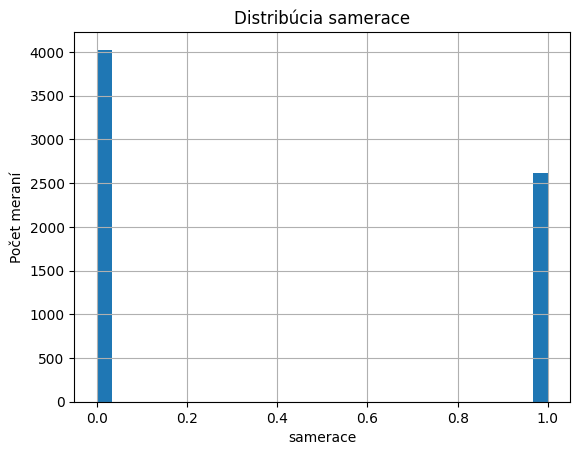

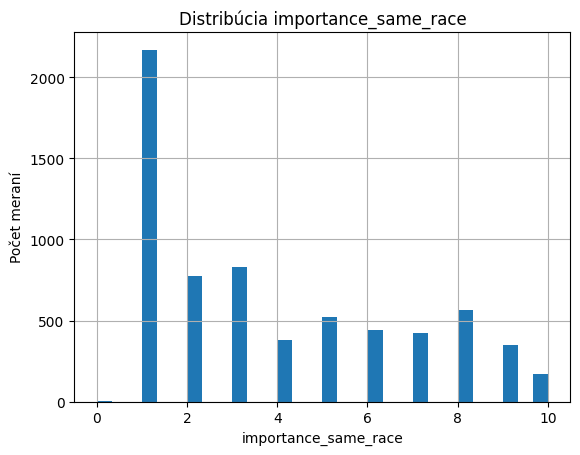

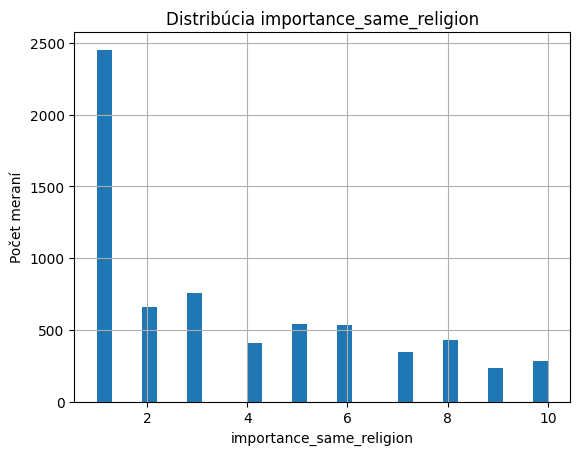

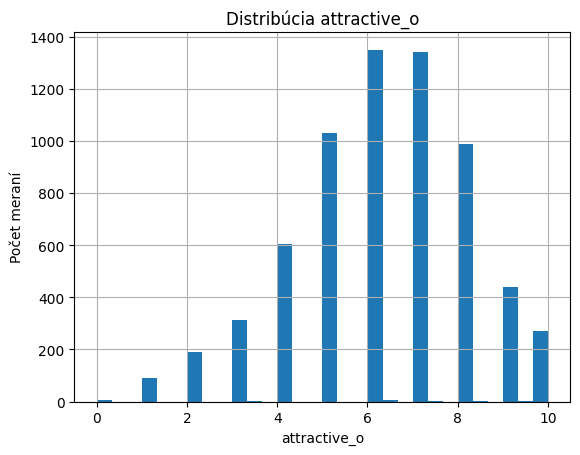

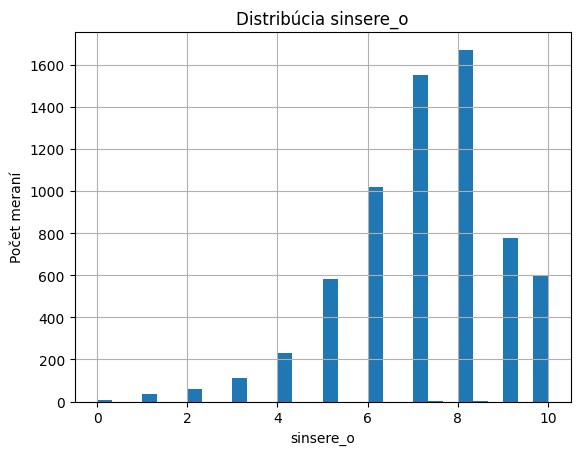

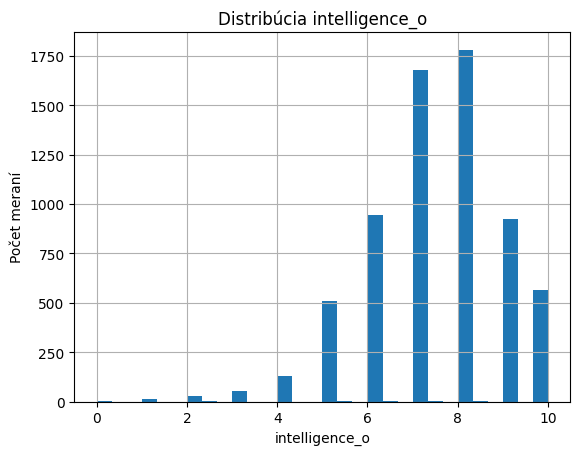

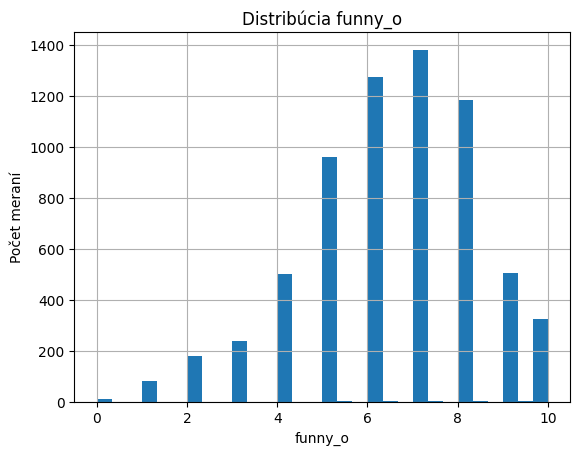

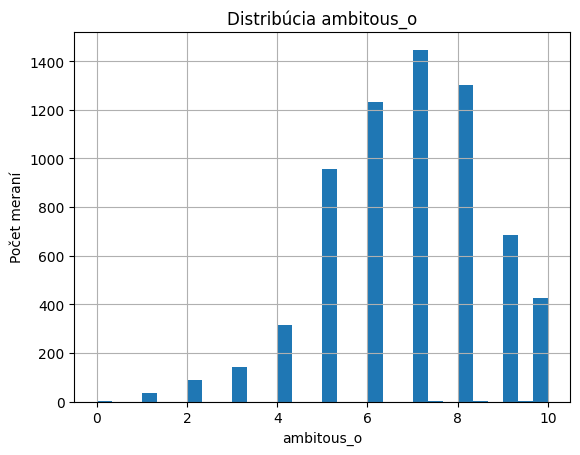

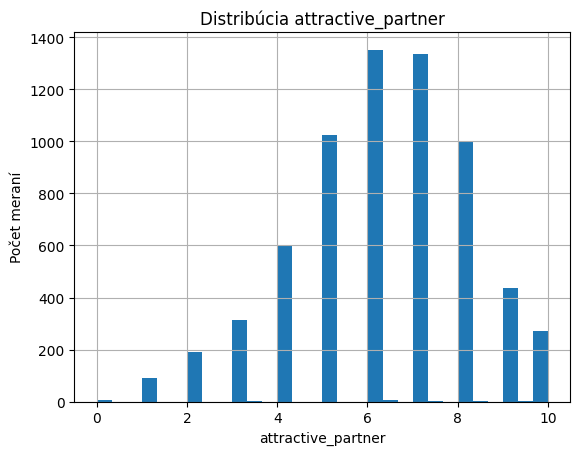

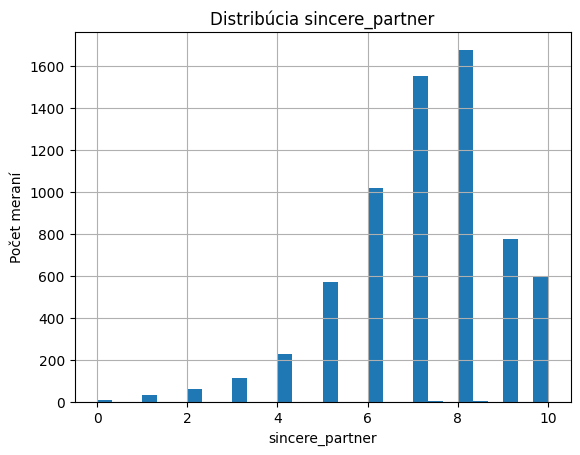

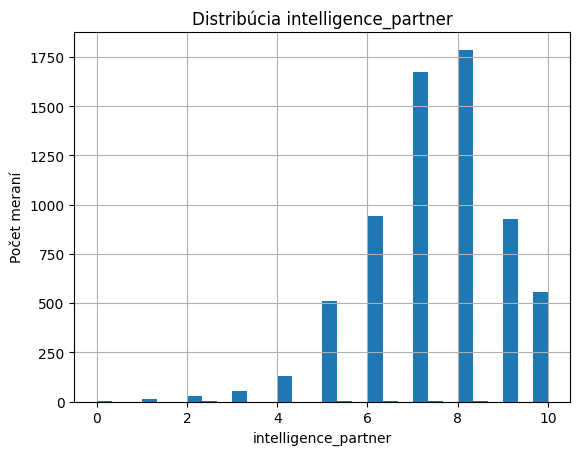

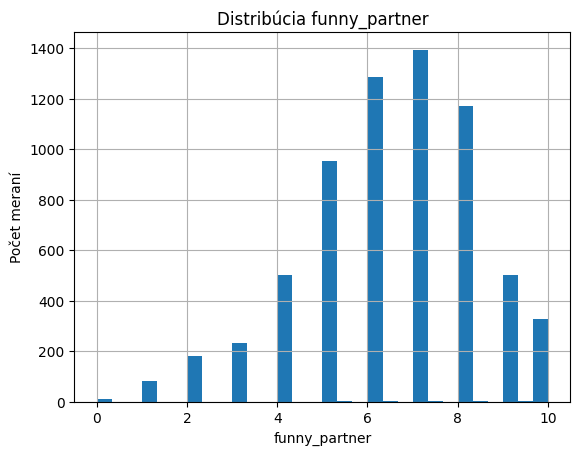

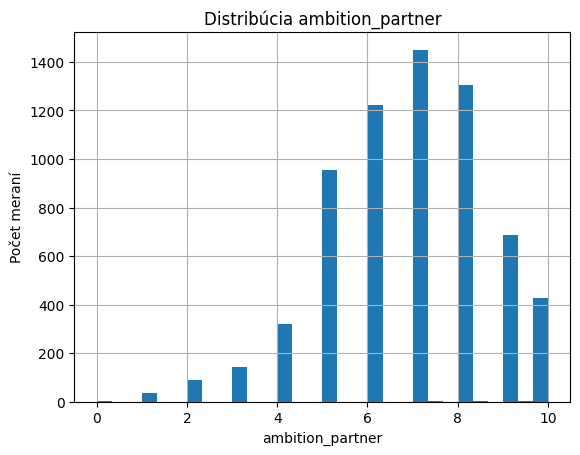

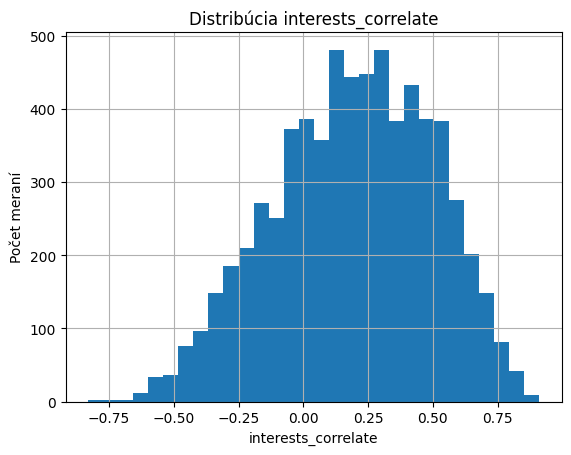

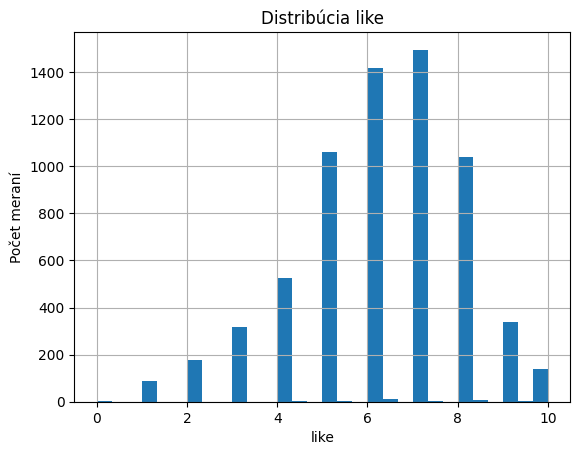

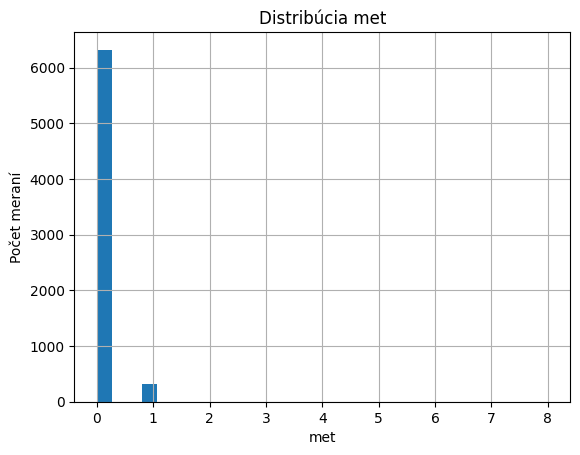

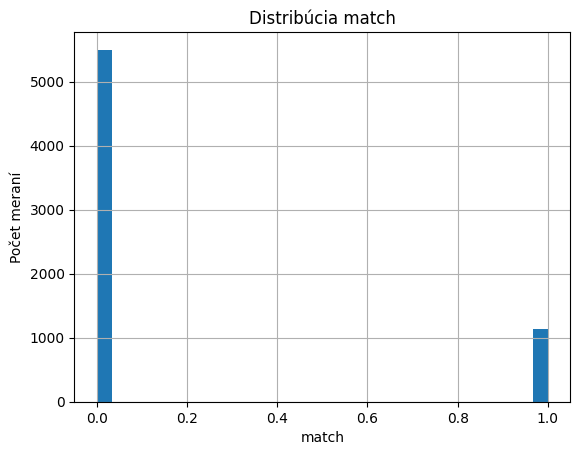

In [ ]:
for col in cols:
    plt.figure()
    data[col].hist(bins=30)
    plt.title(f"Distribúcia {col}")
    plt.xlabel(col)
    plt.ylabel("Počet meraní")
    plt.show()

Zobrazenie korelácii pomocou korelačnej matice na základe Pearsonovho korelačného koeficientu.

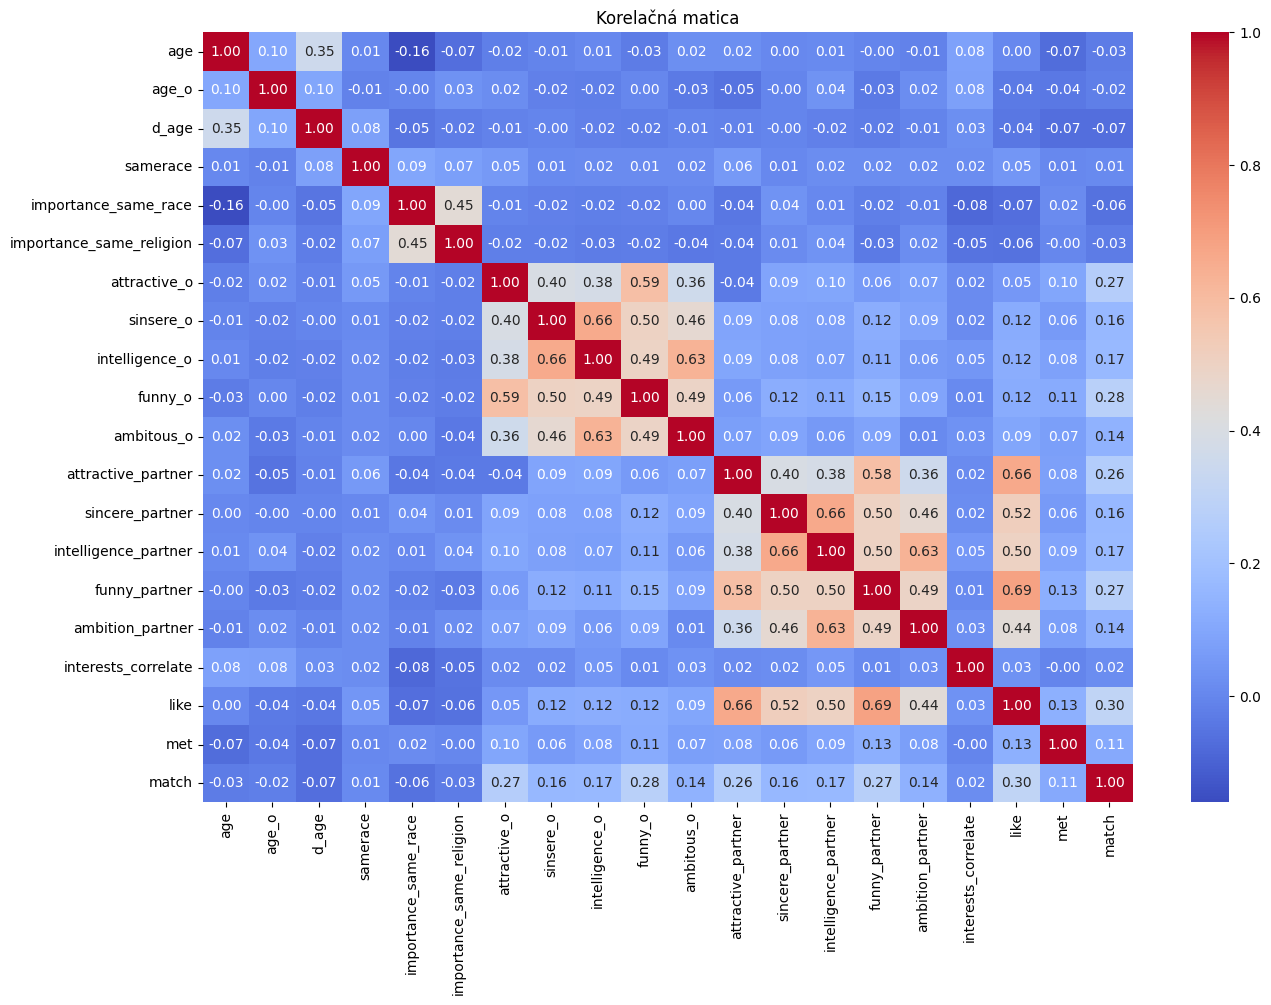

In [ ]:
corr_matrix = data[numeric_columns].corr(method='pearson')
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelačná matica")
plt.show()

## **1.4 Hypotézy**

## **1.5 Evaluation metrics**

Accuracy -> Podiel správnych predpovedí

F1-score

Confusion matrix -> Vizualizácia správnych a nesprávnych predpovedí


Encoding kategorickej premennej gender

In [ ]:
data = pd.get_dummies(data, columns=['gender'], drop_first=True)
data['gender_male'] = data['gender_male'].astype(int)



In [ ]:
data.head(100)

,age,age_o,d_age,samerace,importance_same_race,importance_same_religion,attractive_o,sinsere_o,intelligence_o,funny_o,...,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,interests_correlate,like,met,match,gender_male
0,21.0,27.0,6,0,2,4,6.0,8.0,8.0,8.0,...,6.0,9.0,7.0,7.0,6.0,0.14,7.0,0,0,0
1,21.0,22.0,1,0,2,4,7.0,8.0,10.0,7.0,...,7.0,8.0,7.0,8.0,5.0,0.54,7.0,1,0,0
2,21.0,22.0,1,1,2,4,10.0,10.0,10.0,10.0,...,5.0,8.0,9.0,8.0,5.0,0.16,7.0,1,1,0
3,21.0,23.0,2,0,2,4,7.0,8.0,9.0,8.0,...,7.0,6.0,8.0,7.0,6.0,0.61,7.0,0,1,0
4,21.0,24.0,3,0,2,4,8.0,7.0,9.0,6.0,...,5.0,6.0,7.0,7.0,6.0,0.21,6.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,26.0,24.0,2,1,4,4,6.0,6.0,6.0,6.0,...,9.0,9.0,8.0,10.0,8.0,0.08,9.0,0,0,0
100,27.0,21.0,6,0,7,3,6.0,9.0,7.0,7.0,...,6.0,8.0,8.0,8.0,8.0,0.14,7.0,0,0,1
101,27.0,24.0,3,1,7,3,5.0,7.0,8.0,4.0,...,8.0,7.0,6.0,9.0,7.0,0.29,7.0,0,0,1
102,27.0,25.0,2,1,7,3,7.0,9.0,10.0,7.0,...,7.0,8.0,6.0,5.0,8.0,-0.24,5.0,1,0,1


Kontrola správnosti predikovanej premennej

In [ ]:
'''check_match = ((data['decision'] == 1) & (data['decision_o'] == 1)).astype(int)
print("Rozdielne riadky:", (check_match != data['match']).sum())'''

'check_match = ((data[\'decision\'] == 1) & (data[\'decision_o\'] == 1)).astype(int)\nprint("Rozdielne riadky:", (check_match != data[\'match\']).sum())'

Rozdelenie datasetu na trénovaciu a testovaciu množinu, pričom bol zachovaný pomer match:unmatch v oboch množinách.

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['match'])
y = data['match']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


Normalizácia údajov o veku

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scale_cols = ['age', 'age_o', 'd_age']

scaler = MinMaxScaler()

X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

In [ ]:
print("Tvar tréningových dát:", X_train.shape)
print("Tvar testovacích dát:", X_test.shape)
print("Pomer tried v trénovacej množine:\n", y_train.value_counts(normalize=True))
print("Pomer tried v testovacej množine:\n", y_test.value_counts(normalize=True))

Tvar tréningových dát: (5310, 20)
Tvar testovacích dát: (1328, 20)
Pomer tried v trénovacej množine:
 match
0    0.82806
1    0.17194
Name: proportion, dtype: float64
Pomer tried v testovacej množine:
 match
0    0.828313
1    0.171687
Name: proportion, dtype: float64


LDA: reduced shape (5310, 1)


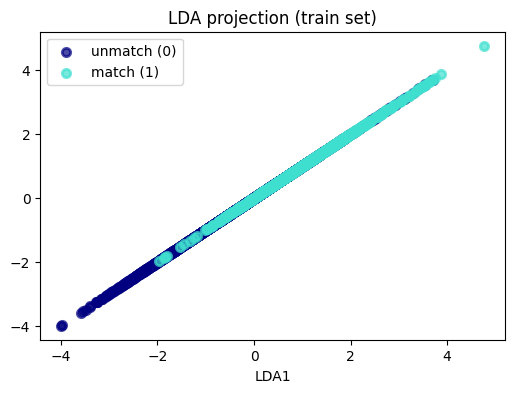

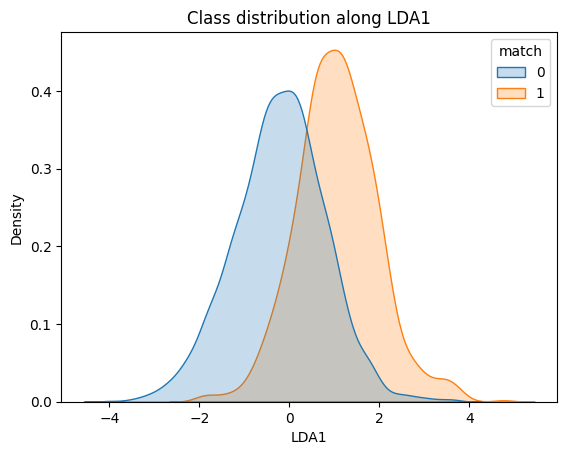

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


def plot_reduced_dataset(X_r, y, fig_title):
    plt.figure(figsize=(6,4))
    colors = ['navy', 'turquoise']
    lw = 2
    target_names = ['unmatch (0)', 'match (1)']


    for color, i, target_name in zip(colors, [0, 1], target_names):
        plt.scatter(
            X_r[y == i, 0],
            X_r[y == i, 0 if X_r.shape[1] == 1 else 1],
            color=color,
            alpha=0.7,
            lw=lw,
            label=target_name
        )

    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(fig_title)
    plt.xlabel("LDA1")
    plt.ylabel("LDA2" if X_r.shape[1] > 1 else "")
    plt.show()


X_numeric = X_train.select_dtypes(include=['int64', 'float64'])
y_numeric = y_train

lda = LinearDiscriminantAnalysis(n_components=1)   # redukcia na 1D
X_lda = lda.fit(X_numeric, y_numeric).transform(X_numeric)

print('LDA: reduced shape', X_lda.shape)

plot_reduced_dataset(X_lda, y_numeric.values, "LDA projection (train set)")

df_plot = pd.DataFrame({'LDA1': X_lda[:, 0], 'match': y_numeric.values})
sns.kdeplot(data=df_plot, x='LDA1', hue='match', fill=True, common_norm=False)
plt.title("Class distribution along LDA1")
plt.show()


In [ ]:
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
import torch

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.to_numpy().reshape(-1, 1), dtype=torch.float32)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.to_numpy().reshape(-1, 1), dtype=torch.float32)

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

n_epochs = 30
batch_size = 32
learning_rate = 0.001


train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


input_dim = X_train.shape[1]
model = MLP(input_dim)

loss_function = nn.BCELoss()
opt_alg = optim.Adam(model.parameters(), lr=learning_rate)


for epoch in range(n_epochs):
    model.train()
    train_loss = []
    correct = 0
    total = 0

    for X_batch, y_batch in train_loader:
        opt_alg.zero_grad()
        prediction = model(X_batch)
        loss = loss_function(prediction, y_batch)
        loss.backward()
        opt_alg.step()
        train_loss.append(loss.item())

        preds = (prediction > 0.5).float()
        correct += (preds == y_batch).sum().item()
        total += y_batch.size(0)

    epoch_loss = np.mean(train_loss)
    epoch_acc = correct / total

    print(f"Epoch {epoch+1}/{n_epochs} - Training Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")


Epoch 1/30 - Training Loss: 0.4628, Accuracy: 0.8275
Epoch 2/30 - Training Loss: 0.4075, Accuracy: 0.8282
Epoch 3/30 - Training Loss: 0.3887, Accuracy: 0.8365
Epoch 4/30 - Training Loss: 0.3817, Accuracy: 0.8392
Epoch 5/30 - Training Loss: 0.3759, Accuracy: 0.8373
Epoch 6/30 - Training Loss: 0.3690, Accuracy: 0.8429
Epoch 7/30 - Training Loss: 0.3657, Accuracy: 0.8429
Epoch 8/30 - Training Loss: 0.3651, Accuracy: 0.8418
Epoch 9/30 - Training Loss: 0.3617, Accuracy: 0.8492
Epoch 10/30 - Training Loss: 0.3572, Accuracy: 0.8446
Epoch 11/30 - Training Loss: 0.3586, Accuracy: 0.8439
Epoch 12/30 - Training Loss: 0.3593, Accuracy: 0.8431
Epoch 13/30 - Training Loss: 0.3560, Accuracy: 0.8475
Epoch 14/30 - Training Loss: 0.3519, Accuracy: 0.8508
Epoch 15/30 - Training Loss: 0.3497, Accuracy: 0.8490
Epoch 16/30 - Training Loss: 0.3492, Accuracy: 0.8469
Epoch 17/30 - Training Loss: 0.3518, Accuracy: 0.8495
Epoch 18/30 - Training Loss: 0.3493, Accuracy: 0.8490
Epoch 19/30 - Training Loss: 0.3498, 